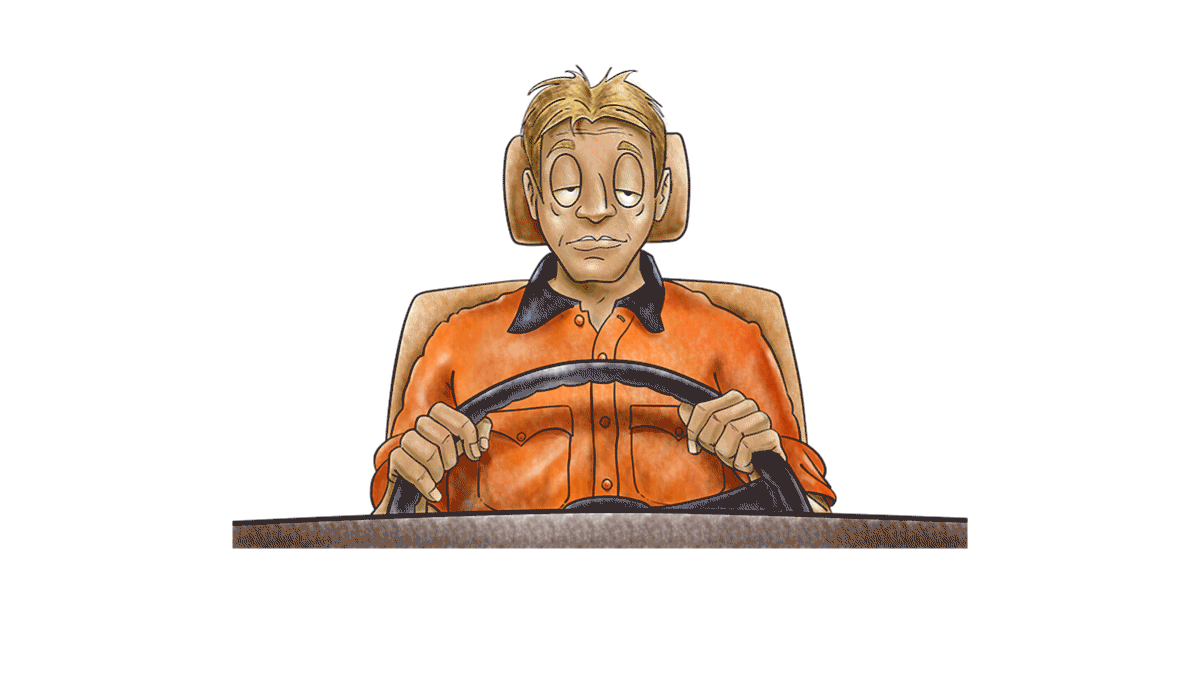

## Driver drowsiness detection is a car safety technology which helps prevent accidents caused by the driver getting drowsy. Various studies have suggested that around 20% of all road accidents are fatigue-related, up to 50% on certain roads.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
import tensorflow as tf
from yoloface import face_analysis
#import a library to show the image
from PIL import Image

#import data visulization tools
import seaborn as sns
import matplotlib.pyplot as plt

#Preprocessing
from sklearn.utils import shuffle
import random
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

#CNN
import tensorflow
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

#Import svm model
from sklearn import svm

#analysis part
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

#gradio
import gradio as gr

# Labels

In [2]:
#os.listdir is for printing a list of names of all the files present in the specified path
labels = os.listdir("C:/Users/noora/Desktop/Data_lebanon/data_nour/15_datascienceprojects/Projects_Intermediate/project_data_science/train")

In [3]:
labels

['Closed', 'no_yawn', 'Open', 'yawn']

# Visualize random 1 image

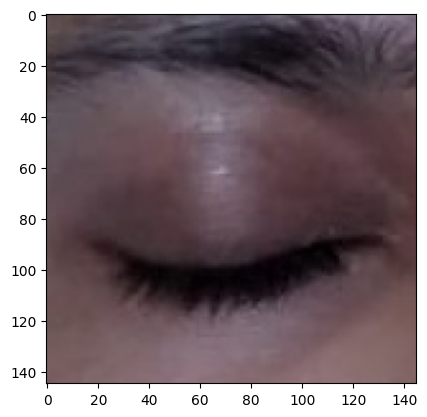

In [5]:
#plt.imshow to visualize our images
plt.imshow(plt.imread("C:/Users/noora/Desktop/Data_lebanon/data_nour/15_datascienceprojects/Projects_Intermediate/project_data_science/train/Closed/_0.jpg"))

# Image array

In [6]:
#read the random image by using imread
a = plt.imread("C:/Users/noora/Desktop/Data_lebanon/data_nour/15_datascienceprojects/Projects_Intermediate/project_data_science/train/yawn/10.jpg")

# Image shape

In [7]:
a.shape

(480, 640, 3)

# Visualize yawn image. 
# Here background is unnecessary. we need only face image array(Face Detection)

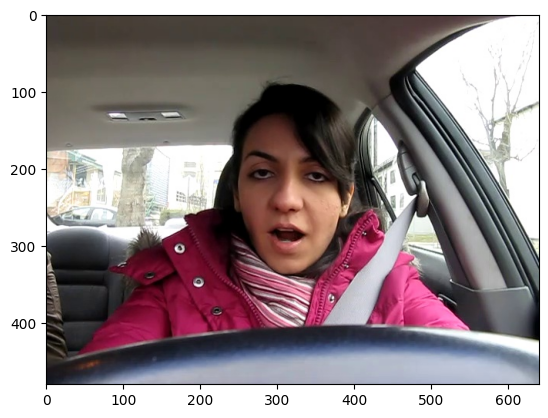

In [8]:
plt.imshow(plt.imread("C:/Users/noora/Desktop/Data_lebanon/data_nour/15_datascienceprojects/Projects_Intermediate/project_data_science/train/yawn/10.jpg"))

### For yawn and not_yawn. Take only face

In [9]:
#This function here for detecting the face of the yawn and no yawn images.
def face_for_yawn(direc="C:/Users/noora/Desktop/Data_lebanon/data_nour/15_datascienceprojects/Projects_Intermediate/project_data_science/train", face_cas_path="C:/Users/noora/Desktop/Data_lebanon/data_nour/15_datascienceprojects/Projects_Intermediate/project_data_science/haarcascade_frontalface_default.xml"):
    #list yawn_no is for saving the detected yawn and no yawn images 
    yaw_no = []
    #Image size
    IMG_SIZE = 145
    categories = ["yawn", "no_yawn"]
    #Looping over the twwo categories
    for category in categories:
        #in these two following instructions we join the directory train folder to the category string in order to loop over all the yawn ans no-yawn images
        path_link = os.path.join(direc, category)
        class_num1 = categories.index(category)
        print(class_num1)
        #Loop over all yawn and no ywan images
        for image in os.listdir(path_link):
            #read every image
            image_array = cv2.imread(os.path.join(path_link, image), cv2.IMREAD_COLOR)
            #Defining the Face Cascade using CascadeClassifier
            #CascadeClassifier is created and the necessary XML file is loaded using the cv::CascadeClassifier::load method
            #The job of the cascade is to quickly discard non-faces and avoid wasting precious time and computations.
            face_cascade = cv2.CascadeClassifier(face_cas_path)
            #Deteccion the face using detectMultiScale Function which returns boundary rectangles for the detected faces.
            faces = face_cascade.detectMultiScale(image_array, 1.3, 5)
            #Iterating through rectangles of detected faces
            for (x, y, w, h) in faces:
                #Drw the rectangle in the currrent image
                img = cv2.rectangle(image_array, (x, y), (x+w, y+h), (0, 255, 0), 2)
                #Crop the image using the x,y,w,h of the rectangle
                roi_color = img[y:y+h, x:x+w]
                #Resizing the cropped image
                resized_array = cv2.resize(roi_color, (IMG_SIZE, IMG_SIZE))
                #Appending the cropped image into the yaw_no list
                yaw_no.append([resized_array, class_num1])
    return yaw_no


yawn_no= face_for_yawn()

0
1


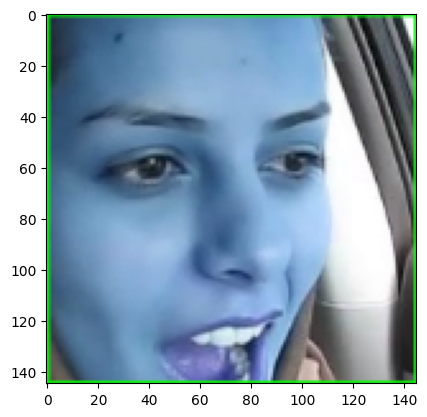

In [10]:
#visualizing the image after object detection
plt.imshow(yawn_no[89][0])

# for closed and Open eye

In [11]:
def get_data(dir_path="C:/Users/noora/Desktop/Data_lebanon/data_nour/15_datascienceprojects/Projects_Intermediate/project_data_science/train", face_cas="C:/Users/noora/Desktop/Data_lebanon/data_nour/15_datascienceprojects/Projects_Intermediate/project_data_science/haarcascade_frontalface_default.xml", eye_cas="C:/Users/noora/Desktop/Data_lebanon/data_nour/15_datascienceprojects/Projects_Intermediate/project_data_science/haarcascade.xml"):
    labels = ['Closed', 'Open']
    IMG_SIZE = 145
    #list data is for saving the closed and open eye images 
    data = []
    #Loop over the catgories and join this category to our train  folder in order to get the path link to the Closed and Open folder of our dataset.
    for label in labels:
        path = os.path.join(dir_path, label)
        class_num = labels.index(label)
        class_num +=2
        print(class_num)
        #Loop over all the  Clàsed and Open eye images.
        for img in os.listdir(path):
            try:
                #Read the image
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                #resize the image
                resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                #Append the resized image into the data list
                data.append([resized_array, class_num])
            except Exception as e:
                print(e)
    return data

# Extend data and convert array

In [12]:
#This fucntion is to extend all the data and then convert it array
def append_data():
    yaw_no = face_for_yawn()
    data = get_data()
    yaw_no.extend(data)
    return np.array(yaw_no)

# New variable to store

In [13]:
#New data that we created where we store all our images.
new_data = append_data()

0
1
2
3


C:\Users\noora\AppData\Local\Temp\ipykernel_15420\925800102.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(yaw_no)


# Separate label and features

In [14]:
#X for the features
#y for the labels
X = []
y = []
for feature, label in new_data:
    X.append(feature)
    y.append(label)

# Reshape the array

In [15]:
#Convert X into array and then reshaping it
X = np.array(X)
X = X.reshape(-1, 145, 145, 3)

# LabelBinarizer

In [16]:
#Label Binarizer is an SciKit Learn class that accepts Categorical data as input and returns an Numpy array.
#Unlike Label Encoder, it encodes the data into dummy variables indicating the presence of a particular label or not. 
label_bin = LabelBinarizer()
#We need to encode the y categorigal labels into dummy labels so the future deep learning classifier can understand them.
y = label_bin.fit_transform(y)

# Label array

In [17]:
#Convert yu into array
y = np.array(y)

# Split the data into training and testing data

In [18]:
#We use the train_test_split function of sklearn
# Seed ensures that the splits that you generate are reproducible
seed = 42
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, test_size=test_size)

# Length of X_test

In [19]:
len(X_test)

578

# Data Augmentation

Data augmentation is a technique in machine learning used to reduce overfitting when training a machine learning model, by training models on several slightly-modified copies of existing data.

In [20]:
#Here we rescale the train data and do some augmentations techniques to them like like zooming, flipping and rotation.
train_generator = ImageDataGenerator(rescale=1/255, zoom_range=0.2, horizontal_flip=True, rotation_range=30)
#For the test data we just rescaling them
test_generator = ImageDataGenerator(rescale=1/255)

#Prepare the data generator and get batches of images by calling the flow function
train_generator = train_generator.flow(np.array(X_train), y_train, shuffle=False)
test_generator = test_generator.flow(np.array(X_test), y_test, shuffle=False)

# VGG-16 Model
The VGG-16 is one of the most popular pre-trained models for image classification. Introduced in the famous ILSVRC 2014 Conference, it was and remains THE model to beat even today. Developed at the Visual Graphics Group at the University of Oxford, VGG-16 beat the then standard of AlexNet and was quickly adopted by researchers and the industry for their image Classification Tasks.

In [42]:
#Imporing vgg16 using keras in tensorflow
from tensorflow.keras.applications.vgg16 import VGG16

#We will be using only the basic models, with changes made only to the final layer.
base_model = VGG16(input_shape = (145,145, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

 Since we don’t have to train all the layers, we make them non_trainable:

In [43]:
for layer in base_model.layers:
    layer.trainable = False

In [44]:
# Flatten the output layer to 1 dimension
x = tensorflow.keras.layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = tensorflow.keras.layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = tensorflow.keras.layers.Dropout(0.5)(x)

# Add a final sigmoid layer with 1 node for classification output
x = tensorflow.keras.layers.Dense(4, activation='softmax')(x)

model = tf.keras.models.Model(base_model.input, x)
#Compile the model
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [45]:
#Fit the model
vgghist = model.fit(train_generator, epochs=50, validation_data=test_generator, shuffle=True,validation_steps = len(test_generator))

Epoch 1/50
43/43 [==============================] - 39s 883ms/step - loss: 1.0202 - accuracy: 0.7736 - val_loss: 0.3553 - val_accuracy: 0.8460
Epoch 2/50
43/43 [==============================] - 37s 864ms/step - loss: 0.2311 - accuracy: 0.9057 - val_loss: 0.1488 - val_accuracy: 0.9394
Epoch 3/50
43/43 [==============================] - 39s 908ms/step - loss: 0.1810 - accuracy: 0.9235 - val_loss: 0.1321 - val_accuracy: 0.9464
Epoch 4/50
43/43 [==============================] - 40s 938ms/step - loss: 0.1552 - accuracy: 0.9324 - val_loss: 0.1155 - val_accuracy: 0.9533
Epoch 5/50
43/43 [==============================] - 38s 883ms/step - loss: 0.1480 - accuracy: 0.9384 - val_loss: 0.1184 - val_accuracy: 0.9516
Epoch 6/50
43/43 [==============================] - 38s 877ms/step - loss: 0.1421 - accuracy: 0.9414 - val_loss: 0.1130 - val_accuracy: 0.9464
Epoch 7/50
43/43 [==============================] - 39s 895ms/step - loss: 0.1284 - accuracy: 0.9540 - val_loss: 0.1351 - val_accuracy: 0.9377

# Test Accuracy

In [46]:
test_loss, test_acc = model.evaluate(test_generator,verbose=1)
print('Testing accuracy',test_acc)

19/19 [==============================] - 11s 551ms/step - loss: 0.0816 - accuracy: 0.9671
Testing accuracy 0.9671280384063721


Awesome! As you can see, we were able to achieve a testing Accuracy of 96% with 50 epochs and without any major changes to the model. This is where we realize how powerful transfer learning is and how useful pre-trained models for image classification can be. A caveat here though – VGG16 takes up a long time to train compared to other models and this can be a disadvantage when we are dealing with huge datasets.

# Learning Curves for Loss and Accuracy

In [1]:
#This function is for plotting the learning curves of loss and accuracy.
def plot_history_scores(dict_history, first_score, second_score):
    with plt.style.context('seaborn-whitegrid'):
        fig = plt.figure(figsize=(25,10))
        # summarize history for accuracy
        plt.subplot(1, 2, 1)
        plt.plot(dict_history.history[first_score], color="g")
        plt.plot(dict_history.history['val_' + first_score],
                 linestyle='--', color="orange")
        plt.yticks(fontsize=14)
        plt.xticks(fontsize=14)
        plt.title('CNN model ' + first_score, fontsize=20)
        plt.ylabel(first_score,fontsize=18)
        plt.xlabel('epoch',fontsize=18)
        plt.legend(['train', 'validation'], loc='upper left',fontsize=15)
        # summarize history for loss
        plt.subplot(1, 2, 2)
        plt.plot(dict_history.history[second_score], color="g")
        plt.plot(dict_history.history['val_' + second_score],
                 linestyle='--', color="orange")
        plt.yticks(fontsize=14)
        plt.xticks(fontsize=14)
        plt.title('CNN model ' + second_score,fontsize=20)
        plt.ylabel(second_score, fontsize=18)
        plt.xlabel('epoch',fontsize=18)
        plt.legend(['train', 'validation'], loc='upper left',fontsize=15)  
        plt.show()

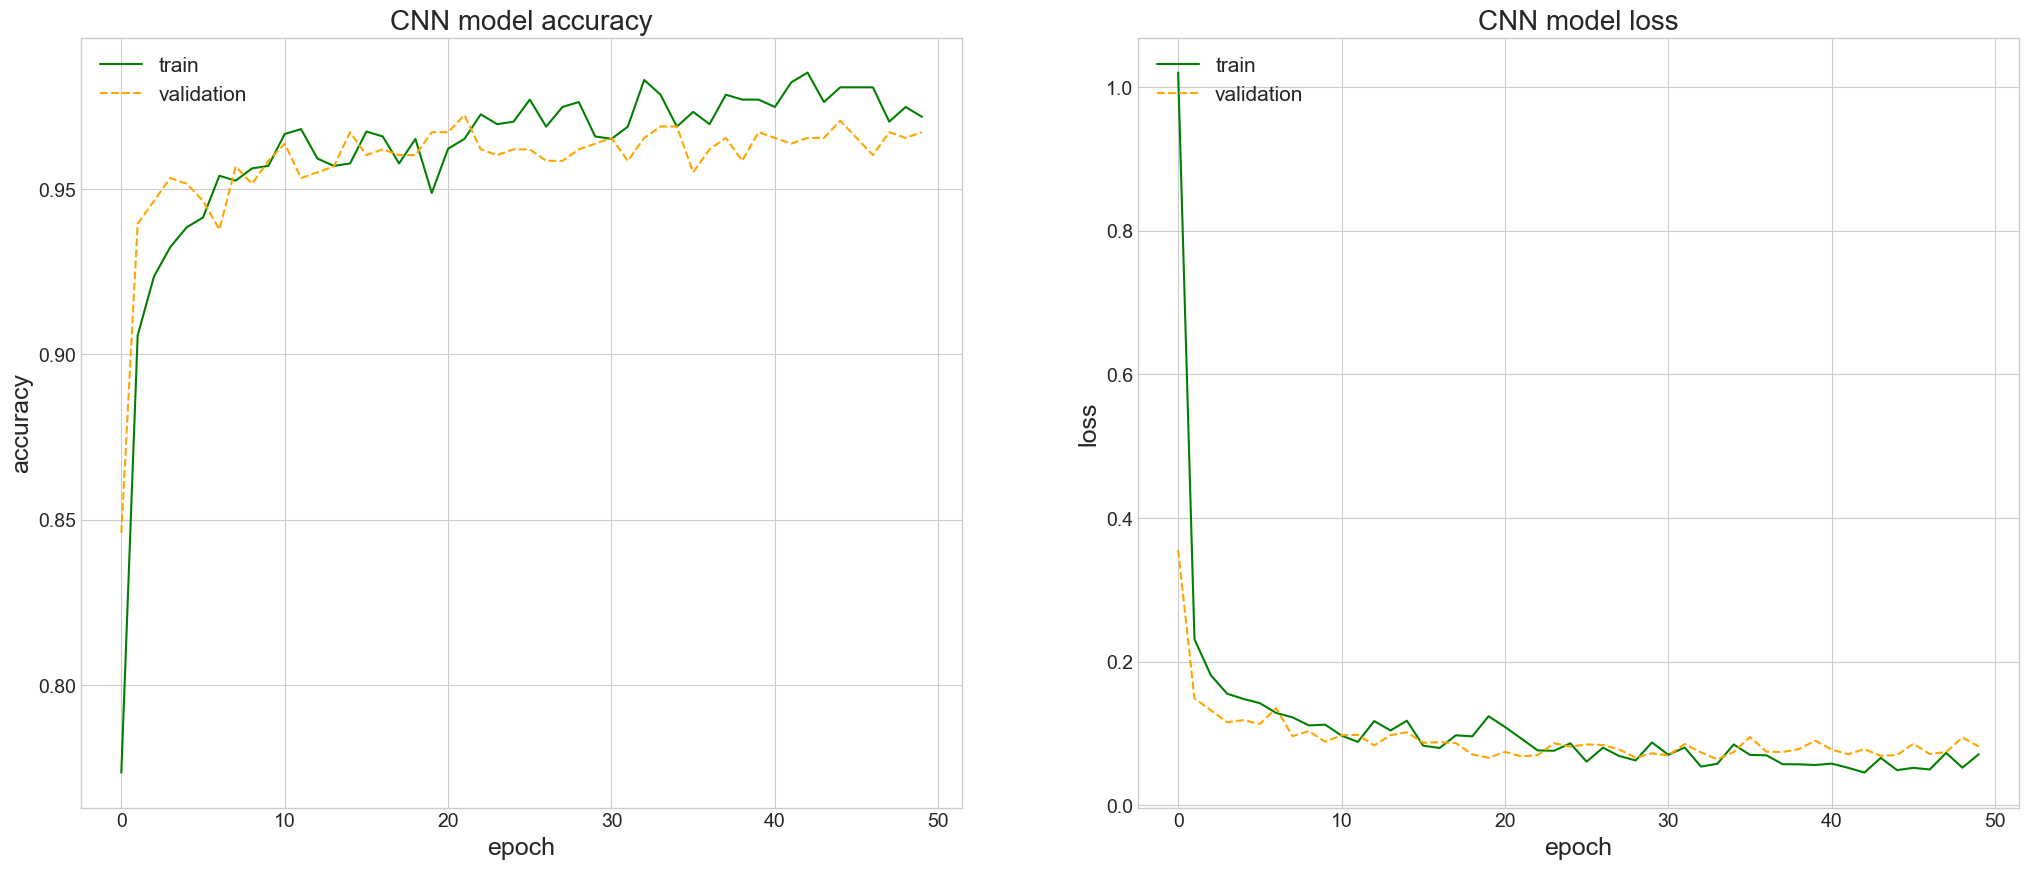

In [52]:
plot_history_scores(
    dict_history = vgghist, 
    first_score = "accuracy", 
    second_score = "loss")

### Save the VGG-16 Model

In [53]:
model.save("drowiness_new30.h5")

In [54]:
model.save("drowiness_new30.model")

INFO:tensorflow:Assets written to: drowiness_new30.model\assets


INFO:tensorflow:Assets written to: drowiness_new30.model\assets


# Predictions

In [143]:
model = tf.keras.models.load_model("./drowiness_new30.h5")

In [144]:
#pred is the predictions list that we have after applying VGG-16
pred = model.predict(test_generator)
#Take the index that contains the maximum value in pred list.
pred = np.argmax(pred,axis = 1) 
#Make the y-test as numbers again. (Removing the labelBinarizer)
y_true = np.argmax(y_test,axis = 1)

19/19 [==============================] - 10s 540ms/step


# Classification report

In [24]:
from sklearn.metrics import classification_report
labels_new = ["yawn", "no_yawn", "Closed","Open"]
print(classification_report(np.argmax(y_test, axis=1), pred, target_names=labels_new))

              precision    recall  f1-score   support

        yawn       0.98      0.81      0.89        63
     no_yawn       0.85      0.99      0.91        74
      Closed       1.00      0.98      0.99       215
        Open       0.98      1.00      0.99       226

    accuracy                           0.97       578
   macro avg       0.95      0.94      0.94       578
weighted avg       0.97      0.97      0.97       578



# Confusion Matrix

C:\Users\noora\AppData\Local\Temp\ipykernel_5612\695417406.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+labels_new)
C:\Users\noora\AppData\Local\Temp\ipykernel_5612\695417406.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+labels_new)


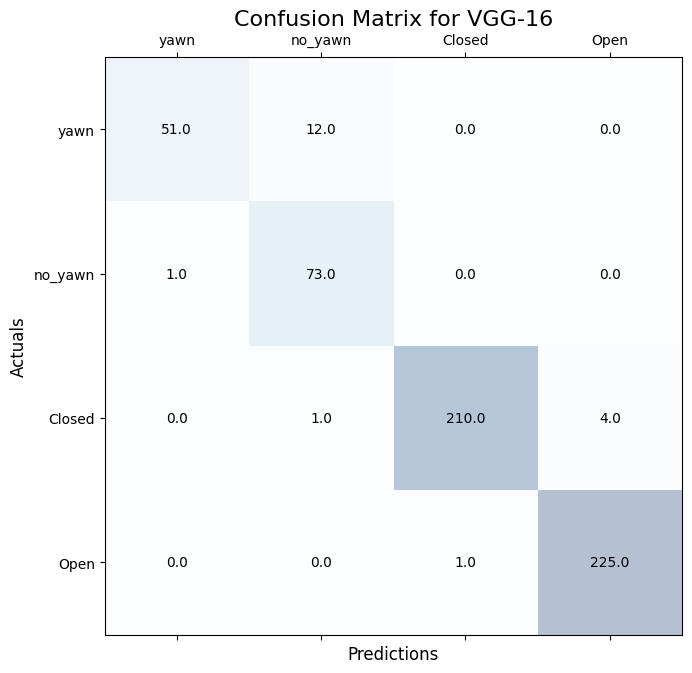

In [25]:
# Print the confusion matrix using Matplotlib
cm_vgghist = confusion_matrix(y_true,pred)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm_vgghist, cmap=plt.cm.Blues, alpha=0.3)
for (i, j), z in np.ndenumerate(cm_vgghist):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

ax.set_xticklabels(['']+labels_new)
ax.set_yticklabels(['']+labels_new)
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix for VGG-16', fontsize=16)
plt.show()

# Evaluation of the VGG-16 Model

In [93]:
#labeling status
label_to_status_map = {
    0:'yawn',
    1:'no_yawn',
    2:'Closed',
    3:'Open'
}

In [94]:
#to plot image
def show_image(data,status):
    plt.imshow(data)
    plt.title(f'size (w, h): {data.size}, status: {status}')
    plt.show()

In [211]:
IMG_SIZE = 145
N = 1

# get random indices on the first dimension
idx = np.random.choice(np.arange(X_test.shape[0]), size=N)

# Get a random array in CX_test and then print the label of this image.
arr=X_test[idx]
arr_new=arr.reshape(IMG_SIZE,IMG_SIZE,3)
arr_new = arr_new.astype(np.uint8)
img=Image.fromarray(arr_new)
pred = model.predict(arr)
pred = np.argmax(pred,axis = 1)
status = label_to_status_map[pred[0]]
print(status)

1/1 [==============================] - 0s 31ms/step
Open


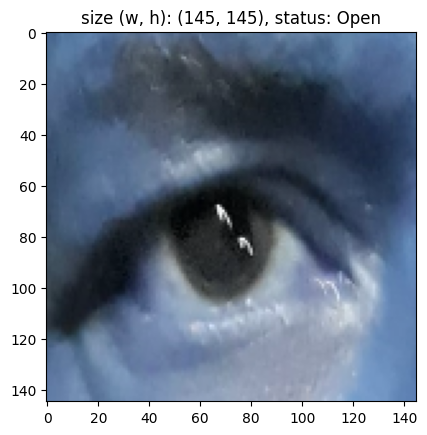

In [212]:
show_image(img,status)

# Let's begin with the KNN Classifier

### Scaling our Images before KNN classifier

In [20]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train/=255
X_test/=255

### Make X_train and X_test as 2 dimentinol arrays since KNN is not suited for 3 dimentional arrays.

In [21]:
m = X_train.shape[0]
d2_train_dataset= X_train.reshape(m,-1)
n=X_test.shape[0]
d2_test_dataset=X_test.reshape(n,-1)
print(d2_train_dataset.shape)
print(y_train.shape)

(1347, 63075)
(1347, 4)


### Make y_train and y_test as 1 dimentinol arrays.

In [22]:
y_train=np.argmax(y_train,axis = 1) 

In [23]:
y_train.shape

(1347,)

In [24]:
y_test=np.argmax(y_test,axis = 1) 

In [25]:
y_test.shape

(578,)

### Let's fit KNN classifier

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(d2_train_dataset,y_train)

KNeighborsClassifier(n_neighbors=3)

### Make Predictions

In [27]:
#Predict the response for test dataset
y_pred = knn.predict(d2_test_dataset)

### Testing Accuracy

In [28]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.7906574394463668


We reach an accuracy of 79% which is quiet less than the accuracy of VGG-16

### Confucion Matrix

C:\Users\noora\AppData\Local\Temp\ipykernel_15420\1433132543.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+labels_new)
C:\Users\noora\AppData\Local\Temp\ipykernel_15420\1433132543.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+labels_new)


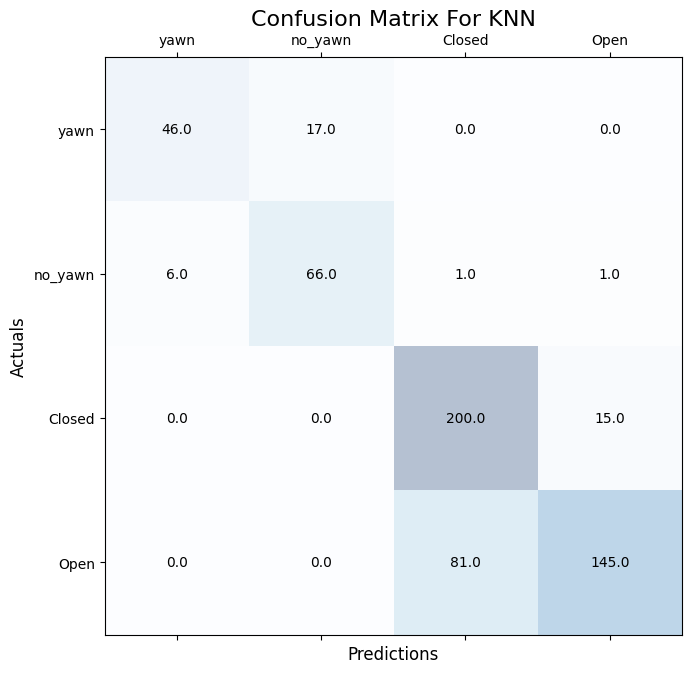

In [29]:
# Print the confusion matrix using Matplotlib
labels_new = ["yawn", "no_yawn", "Closed","Open"]
cm_knn = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm_knn, cmap=plt.cm.Blues, alpha=0.3)
for (i, j), z in np.ndenumerate(cm_knn):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

ax.set_xticklabels(['']+labels_new)
ax.set_yticklabels(['']+labels_new)
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix For KNN', fontsize=16)
plt.show()